# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [67]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp-273.15,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | verkhov'ye
Processing Record 3 of Set 1 | biltine
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | atafu village
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | krasnyy chikoy
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | freetown
Processing Record 11 of Set 1 | revelstoke
Processing Record 12 of Set 1 | la ronge
Processing Record 13 of Set 1 | pyinmana
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | queenstown
Processing Record 18 of Set 1 | phrae
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | colonia
Processing Record 21 of Set 1 | dakhla
Processing Record 22 of Set 1 | mariehamn
Processin

In [68]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [69]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-1.55,90,92,3.69,RU,1684642865
1,verkhov'ye,52.8119,37.2425,9.66,80,9,3.72,RU,1684642865
2,biltine,14.5333,20.9167,29.90,27,27,1.06,TD,1684642866
3,afaahiti,-17.7500,-149.2833,27.81,78,92,2.88,PF,1684642866
4,lebu,-37.6167,-73.6500,11.08,93,100,12.22,CL,1684642641


In [70]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [71]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-1.55,90,92,3.69,RU,1684642865
1,verkhov'ye,52.8119,37.2425,9.66,80,9,3.72,RU,1684642865
2,biltine,14.5333,20.9167,29.90,27,27,1.06,TD,1684642866
3,afaahiti,-17.7500,-149.2833,27.81,78,92,2.88,PF,1684642866
4,lebu,-37.6167,-73.6500,11.08,93,100,12.22,CL,1684642641


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

C:\Users\and_i\AppData\Local\Temp\ipykernel_18812\1073091469.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black",alpha=0.7,cmap="viridis")


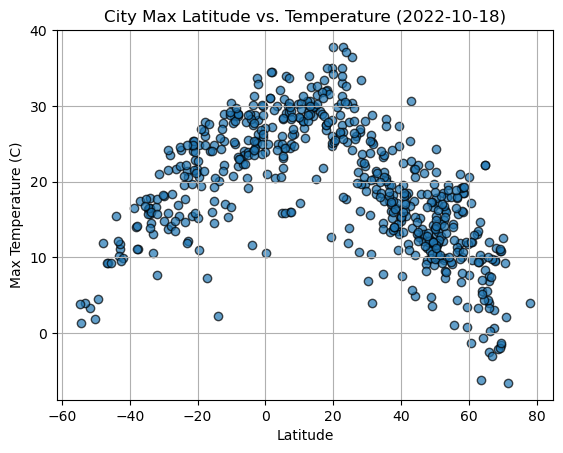

In [72]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black",alpha=0.7,cmap="viridis")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

C:\Users\and_i\AppData\Local\Temp\ipykernel_18812\1558086144.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black",alpha=0.7,cmap="viridis")


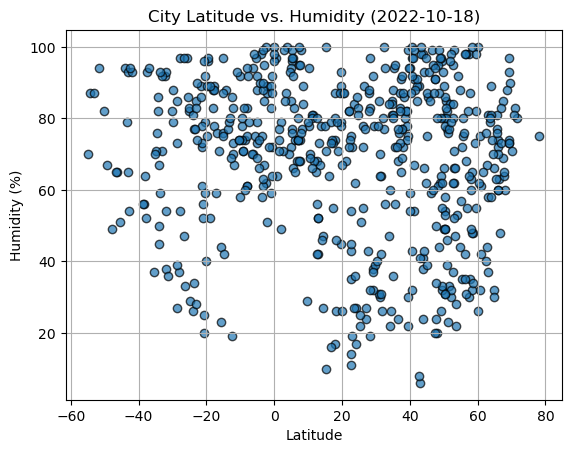

In [73]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black",alpha=0.7,cmap="viridis")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

C:\Users\and_i\AppData\Local\Temp\ipykernel_18812\756766583.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black",alpha=0.7,cmap="viridis")


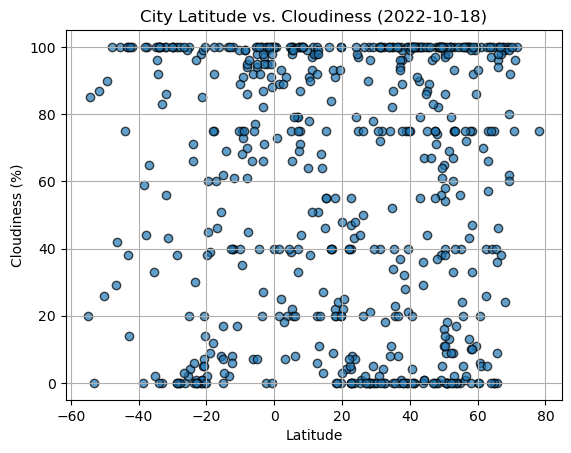

In [74]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black",alpha=0.7,cmap="viridis")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

C:\Users\and_i\AppData\Local\Temp\ipykernel_18812\563550577.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black",alpha=0.7,cmap="viridis")


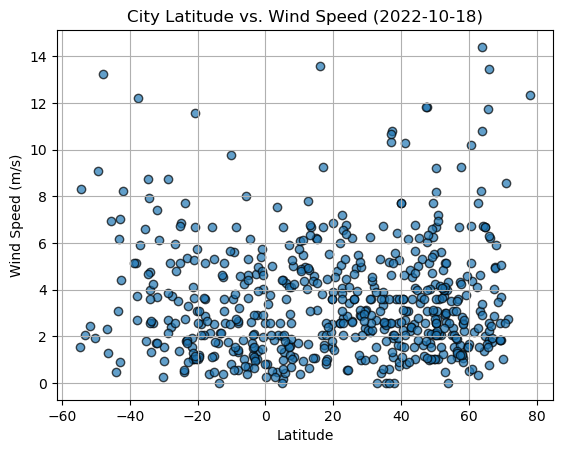

In [75]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black",alpha=0.7,cmap="viridis")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots


In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-1.55,90,92,3.69,RU,1684642865
1,verkhov'ye,52.8119,37.2425,9.66,80,9,3.72,RU,1684642865
2,biltine,14.5333,20.9167,29.90,27,27,1.06,TD,1684642866
7,krasnyy chikoy,50.3643,108.7512,13.09,54,58,2.12,RU,1684642868
9,freetown,8.4840,-13.2299,26.28,84,100,1.09,SL,1684642869


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,afaahiti,-17.7500,-149.2833,27.81,78,92,2.88,PF,1684642866
4,lebu,-37.6167,-73.6500,11.08,93,100,12.22,CL,1684642641
5,atafu village,-8.5421,-172.5159,29.19,74,99,6.68,TK,1684642867
6,edinburgh of the seven seas,-37.0676,-12.3116,17.40,94,65,5.93,SH,1684642867
8,east london,-33.0153,27.9116,10.52,71,0,2.57,ZA,1684642868


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7811645508777486


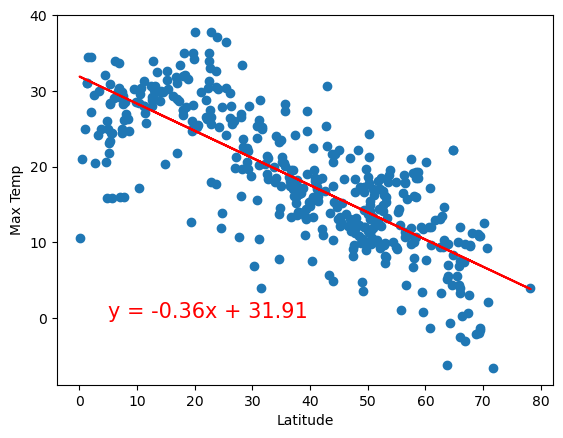

In [80]:
# Linear regression on Northern Hemisphere
a_values = northern_hemi_df["Lat"].astype("float")
b_values = northern_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(a_values, b_values)
regress_values = a_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(a_values,b_values)

# Plot regression line
plt.plot(a_values,regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.7844721110544317


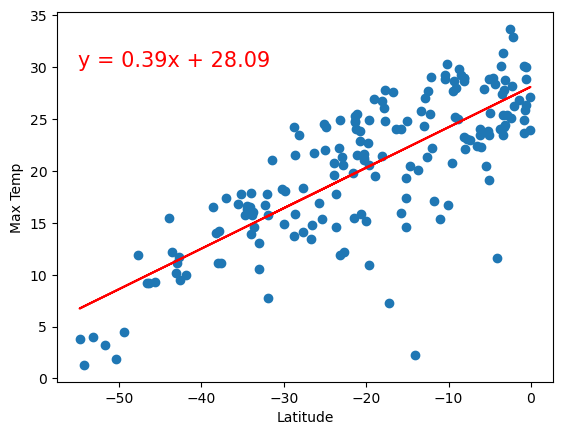

In [82]:
# Linear regression on Southern Hemisphere
f_values = southern_hemi_df["Lat"].astype("float")
g_values = southern_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(f_values, g_values)
regress_values = f_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(f_values,g_values)

# Plot regression line
plt.plot(f_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.06674909094758051


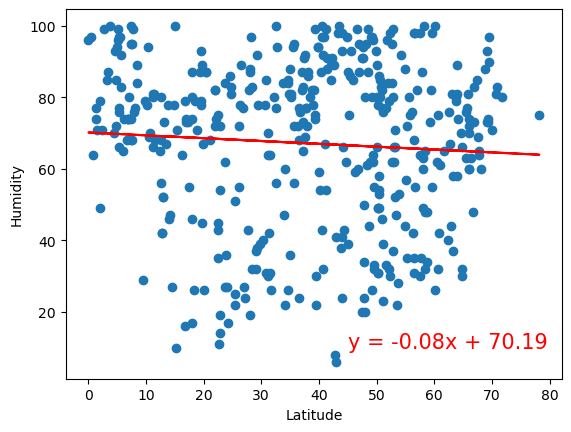

In [83]:
# Northern Hemisphere
a_values = northern_hemi_df["Lat"].astype("float")
c_values = northern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(a_values, c_values)
regress_values = a_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(a_values,c_values)

# Plot regression line
plt.plot(a_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.14928171295871484


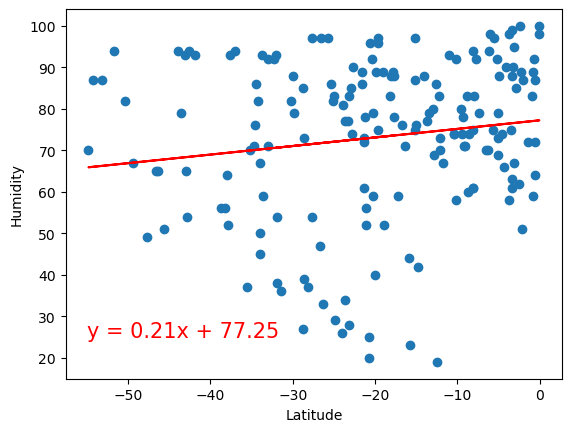

In [84]:
# Southern Hemisphere
f_values = southern_hemi_df["Lat"].astype("float")
h_values = southern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(f_values, h_values)
regress_values = f_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(f_values,h_values)

# Plot regression line
plt.plot(f_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04152971777448469


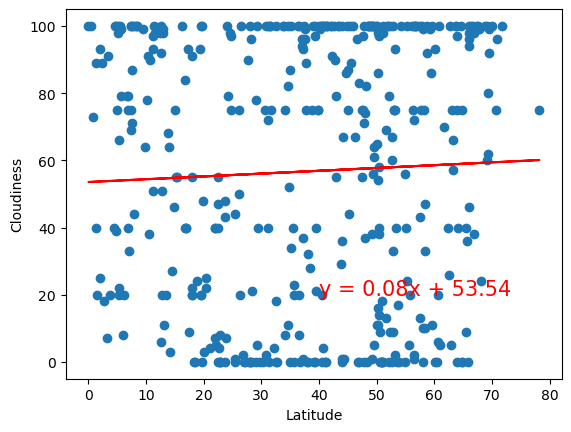

In [85]:
# Northern Hemisphere
a_values = northern_hemi_df["Lat"].astype("float")
d_values = northern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(a_values, d_values)
regress_values = a_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(a_values,d_values)

# Plot regression line
plt.plot(a_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.12016435447961323


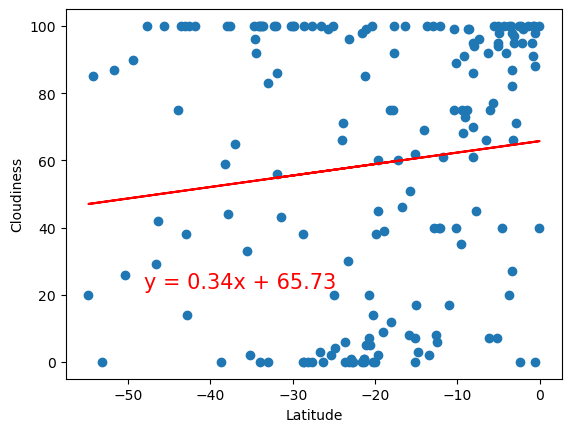

In [86]:
# Southern Hemisphere
f_values = southern_hemi_df["Lat"].astype("float")
i_values = southern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(f_values, i_values)
regress_values = f_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(f_values,i_values)

# Plot regression line
plt.plot(f_values,regress_values,"r-")
plt.annotate(line_eq,(-48,22),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09589558041659806


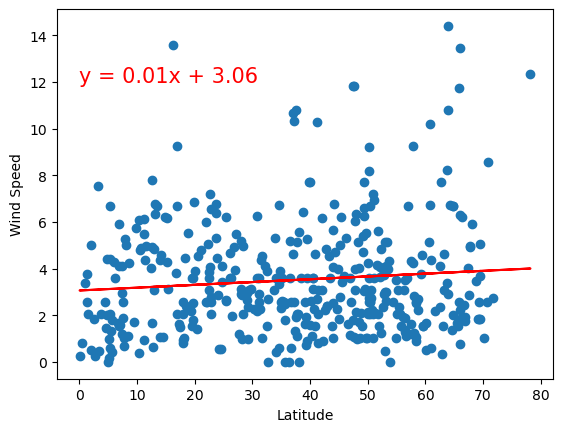

In [87]:
# Northern Hemisphere
a_values = northern_hemi_df["Lat"].astype("float")
e_values = northern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(a_values, e_values)
regress_values = a_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(a_values,e_values)

# Plot regression line
plt.plot(a_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: -0.25843366441816523


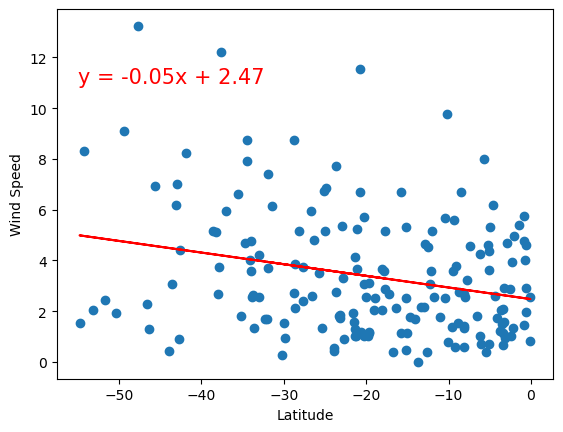

In [88]:
# Southern Hemisphere
f_values = southern_hemi_df["Lat"].astype("float")
j_values = southern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(f_values, j_values)
regress_values = f_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(f_values,j_values)

# Plot regression line
plt.plot(f_values,regress_values,"r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE